In [1]:
import supereeg as se
import pandas as pd
import numpy as np
import os
from scipy import stats
import hypertools as hyp
import plot as plot
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from nilearn import plotting as ni_plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import seaborn as sns

In [2]:
freq_dir = '/Users/lucyowen/Desktop/freq_plots'

In [3]:
freqnames = ['delta', 'theta', 'alpha', 'beta', 'lgamma', 'hgamma', 'broadband']
for freq in freqnames:
    
    freq_df_m = pd.DataFrame()
    df_across = pd.read_csv(os.path.join(freq_dir, freq + '_across.csv'), index_col=0)
    df_within = pd.read_csv(os.path.join(freq_dir, freq + '_within.csv'), index_col=0)
    
    freq_df_m = pd.merge(df_across, df_within, on=['Subject', 'R'])
    freq_df_m.dropna(inplace=True)
    freq_df_m.rename(columns={"Correlation_x":"Correlation_Across", "Correlation_y":"Correlation_Within"}, inplace=True)
    freq_df = pd.DataFrame()
    freq_df['across'] = freq_df_m['Correlation_Across']
    freq_df['within'] = freq_df_m['Correlation_Within']
    freq_df['Subject'] = freq_df_m['Subject']
    freq_df['R'] = freq_df_m['R']

    corr_freq_df = pd.DataFrame()
    corr_freq_df['Subject'] = freq_df['Subject']
    corr_freq_df['within'] = plot.r2z(freq_df['within'])
    corr_freq_df['across'] = plot.r2z(freq_df['across'])
    corr_freq_df['R'] = freq_df['R']
    
    freq_df.to_csv(os.path.join(freq_dir, freq + '.csv'))
    
    pyfr_locs = plot.compile_df_locs(freq_df['R'])
    corr_pyfr_locs = np.atleast_2d(freq_df['across'])
    
#     outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
    outfile = None
    
    #plot.interp_corr(pyfr_locs, np.atleast_2d(corr_pyfr_locs), width=2, vox_size=2, outfile=outfile)

In [9]:
df_within

,Correlation,Electrode,R,Subject
0,0.629824,90_within,[ 69.72 3.1 -72.07],R1093J
0,0.252088,66_within,[ 53.12 -10.67 -36.52],R1293P
0,0.532306,13_within,[-40.79 31.74 -1.63],R1137E
0,0.294599,55_within,[ 26.63 -24. -24.92],R1106M
0,0.853143,102_within,[ 65.36 -26.49 18.71],R1032D
0,0.191889,54_within,[-41.69 56.94 28.67],R1163T
0,0.450631,16_within,[-53.54 -5.06 -22.93],R1174T
0,0.469835,68_within,[ 23.85 49.44 -23.52],R1075J
0,0.540845,53_within,[-57.94 -11.77 -37.26],R1167M
0,0.393724,15_within,[28.92 42.32 27.17],R1098D


In [8]:
df_across

,Correlation,Electrode,R,Subject
0,0.788247,17,[-43.2 20.75 15.78],R1108J
0,0.816684,59,[-62.18 -5.69 -3.86],R1094T
0,0.820106,32,[ -9.16 46.99 -17.82],R1094T
0,0.499098,43,[ 16.03 -39.56 -12.68],R1106M
0,0.692360,26,[-17.28 -4.77 -43.98],R1108J
0,0.382038,10,[-23.79 28.17 56.07],R1200T
0,0.855049,120,[39.51 -6.04 1.77],R1243T
0,-0.131213,7,[-17.23 13.46 -57.42],R1215M
0,0.422377,16,[-22.06 -2.53 -33.15],R1065J
0,-0.274350,60,[-33.57 14.57 -12.04],R1223E


In [6]:
freq_df['Experiment'].grouby(['Subject'])

KeyError: 'Experiment'

In [7]:
# freq_df = pd.read_csv(os.path.join(freq_dir, freq + '.csv'), index_col=0)

In [8]:
# pyfr_locs = plot.compile_df_locs(freq_df['R'])
# corr_pyfr_locs = np.atleast_2d(freq_df['across'])

In [9]:
# long_form_across = pd.DataFrame()
# long_form_across['Correlation'] = freq_df['across']
# long_form_across['Subject'] = 'a'
# long_form_across['Freq'] = 'alpha'
# long_form_within = pd.DataFrame()
# long_form_within['Correlation'] = freq_df['within']
# long_form_within['Subject'] = 'w'
# long_form_within['Freq'] = 'alpha'

In [10]:
# long_form_freq = long_form_across.append(long_form_within)

In [11]:
# #fig_count +=1
# #outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
# outfile=None
# fig = plt.gcf()
# fig.set_size_inches(4, 10.5)
# plt.ylim(-1.2,2.0)
# ax = sns.violinplot(x="Freq", y="Correlation", hue="Subject", ylim=[-1,1], data=long_form_freq, palette="gray", split=True)
# ax.legend().set_visible(False)
# ax.tick_params(axis='x', labelsize=18)
# ax.tick_params(axis='y', which='both', length=0, labelsize=18)

# z_long_form_freq = long_form_freq.copy(deep=True)
# z_long_form_freq['Correlation'] = plot.r2z(z_long_form_freq['Correlation'])
# yposlist = plot.z2r(z_long_form_freq.groupby(['Freq', 'Subject'])['Correlation'].mean())

# xposlist = range(1)

# c = 0
# for i in range(len(yposlist)):

#     if (i%2) == 0:
#         ax.text(c-.15, yposlist[i], np.round(yposlist[i],2), fontsize=14, color='white')
#     else:
#         ax.text(c+.05, yposlist[i], np.round(yposlist[i],2) , fontsize=14, color='white')
#         c +=1

# ### first two significance lines:
# ylim = 1.2
# for l in range(1):
#     plt.plot([l-.075, l+.075], [1.15, 1.15], marker = '|', mew=2, markersize=10, color='k', linewidth=2)
#     ax.plot(l, 1.15 + .05, marker = '*', markersize=10, color='k')
    
# ax.set_xticklabels(['Delta', 'Theta'])
# ax.set_ylabel('Correlation', fontsize=30)
# ax.set_xlabel('Freq', fontsize=30)
# for index, label in enumerate(ax.yaxis.get_ticklabels()):
#     if index > 5:

#         label.set_visible(False)

# plt.tight_layout()
# #plt.savefig(outfile)

In [12]:
freqnames = ['delta', 'theta', 'alpha', 'beta', 'lgamma', 'hgamma', 'broadband']

long_form_freq = pd.DataFrame()

for freq in freqnames:
    
    freq_df = pd.read_csv(os.path.join(freq_dir, freq + '.csv'), index_col=0)
    
    freq_locs = plot.compile_df_locs(freq_df['R'])
    corr_pyfr_locs = np.atleast_2d(freq_df['across'])
    
    long_form_across = pd.DataFrame()
    long_form_across['Correlation'] = freq_df['across']
    long_form_across['Subject'] = 'a'
    long_form_across['Freq'] = freq
    
    long_form_within = pd.DataFrame()
    long_form_within['Correlation'] = freq_df['within']
    long_form_within['Subject'] = 'w'
    long_form_within['Freq'] = freq
    
    long_form_freq_temp = long_form_across.append(long_form_within)
    
    long_form_freq = long_form_freq.append(long_form_freq_temp)
    
    

In [13]:
long_form_freq.head()

,Correlation,Subject,Freq
0,0.138914,a,delta
1,0.138914,a,delta
2,-0.293794,a,delta
3,-0.293794,a,delta
4,0.440041,a,delta


In [14]:

# freqnames = ['delta', 'theta', 'alpha', 'beta', 'lgamma', 'hgamma', 'broadband']

# fig, axes = plt.subplots(1, 7, figsize=(30, 16), sharey='all')

# norm = matplotlib.colors.Normalize(vmin=0, vmax=len(freqnames))

# rgba = sns.hls_palette(len(freqnames), l=.6, s=.9, h=.2)
# rgba_null = sns.hls_palette(len(freqnames), l=.9, s=.4, h=.2)
# long_form_freq = pd.DataFrame()

# for e, freq in enumerate(freqnames):
    
#     freq_df = pd.read_csv(os.path.join(freq_dir, freq + '.csv'), index_col=0)
    
#     freq_locs = plot.compile_df_locs(freq_df['R'])
#     corr_pyfr_locs = np.atleast_2d(freq_df['across'])
    
#     long_form_across = pd.DataFrame()
#     long_form_across['Correlation'] = freq_df['across']
#     long_form_across['Subject'] = 'a'
#     long_form_across['Freq'] = freq
    
#     long_form_within = pd.DataFrame()
#     long_form_within['Correlation'] = freq_df['within']
#     long_form_within['Subject'] = 'w'
#     long_form_within['Freq'] = freq
    
#     long_form_freq_temp = long_form_across.append(long_form_within)
    

#     plt.ylim(-1,1.2)
#     sns.violinplot(x="Freq", y="Correlation", hue="Subject", ylim=[-1,1], data=long_form_freq_temp,palette={"a": rgba[e], "w": rgba_null[e]}, split=True, ax=axes[e])
#     axes[e].legend().set_visible(False)
#     axes[e].tick_params(axis='x', labelsize=30)
#     #axes[e].set_yticks([])
#     axes[e].set_xticklabels([freq])
#     axes[e].set_xlabel('')
#     axes[e].set_ylabel('')
#     if e ==0:
#         axes[e].tick_params(top='off', bottom='off', left='off', right='off', labelleft='on', labelbottom='on')
#     else:
#         axes[e].tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
#     axes[e].spines['right'].set_visible(False)
#     axes[e].spines['left'].set_visible(False)
#     axes[e].spines['top'].set_visible(False)
#     axes[e].spines['bottom'].set_visible(False)
    
#     z_long_form_freq = long_form_freq_temp.copy(deep=True)
#     z_long_form_freq['Correlation'] = plot.r2z(z_long_form_freq['Correlation'])
#     yposlist = plot.z2r(z_long_form_freq.groupby(['Freq', 'Subject'])['Correlation'].mean())
#     xposlist = range(1)

#     c = 0
#     for i in range(len(yposlist)):

#         if (i%2) == 0:
#             axes[e].text(c-.13, yposlist[i], np.round(yposlist[i],2), fontsize=14, color='k')
#         else:
#             axes[e].text(c+.05, yposlist[i], np.round(yposlist[i],2) , fontsize=14, color='k')
#             c +=1
# axes[0].tick_params(axis='y', which='both', length=0, labelsize=18)
# axes[0].set_ylabel('Correlation', fontsize=30)
# plt.tight_layout()



In [15]:
def plot_split_violin_colors(df, X, Y, H, x_order, hue_order, left_colors, right_colors, outfile=None):
    
    """
    X, Y, H :  names of variables in df
        Inputs for plotting long-form data
        
    df :  DataFrame
        Longform dataframe 
    
    hue_order : lists of strings
        Order to plot the categorical hue variable
        
    x_order : lists of strings
        Order to plot the categorical x variable
        
    left_colors, right_colors : RGB or RGBA tuple of float values 
        RGB values
    
    outfile : string
        Save file

    """
    

    fig, axes = plt.subplots(1, len(x_order), figsize=(30, 16), sharey='all')


    for e, freq in enumerate(x_order):

        #freq_df = pd.read_csv(os.path.join(freq_dir, freq + '.csv'), index_col=0)
        long_form_freq_temp = long_form_freq[long_form_freq[X]==freq]

        plt.ylim(-1,1.2)
        sns.violinplot(x=X, y=Y, hue=H, ylim=[-1,1], data=long_form_freq_temp, 
                       palette={hue_order[0]: left_colors[e], hue_order[1]: right_colors[e]}, split=True, ax=axes[e])
        axes[e].legend().set_visible(False)
        axes[e].tick_params(axis='x', labelsize=30)
        axes[e].set_xticklabels([freq])
        axes[e].set_xlabel('')
        axes[e].set_ylabel('')
        if e ==0:
            axes[e].tick_params(top='off', bottom='off', left='off', right='off', labelleft='on', labelbottom='on')
        else:
            axes[e].tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
        axes[e].spines['right'].set_visible(False)
        axes[e].spines['left'].set_visible(False)
        axes[e].spines['top'].set_visible(False)
        axes[e].spines['bottom'].set_visible(False)

        z_long_form_freq = long_form_freq_temp.copy(deep=True)
        z_long_form_freq[Y] = plot.r2z(z_long_form_freq[Y])
        yposlist = plot.z2r(z_long_form_freq.groupby([X, H])[Y].mean())
        xposlist = range(1)

        c = 0
        for i in range(len(yposlist)):

            if (i%2) == 0:
                axes[e].text(c-.13, yposlist[i], np.round(yposlist[i],2), fontsize=14, color='k')
            else:
                axes[e].text(c+.05, yposlist[i], np.round(yposlist[i],2) , fontsize=14, color='k')
                c +=1
                
    axes[0].tick_params(axis='y', which='both', length=0, labelsize=18)
    axes[0].set_ylabel(Y, fontsize=30)
    plt.tight_layout()

    if outfile:
        plt.savefig(outfile)

In [16]:
# rgba = sns.hls_palette(7, l=.6, s=.9, h=.2)

In [17]:
ram_data_dir = '../../data/ram'

In [18]:
RAM_df = pd.read_csv(os.path.join(ram_data_dir, 'ram.csv'), index_col=0)

In [19]:
dfs = ['W_a_a', 'W_a_all', 'W_a_w', 'W_w_a', 'W_w_all', 'W_w_w']

In [20]:
long_form = plot.long_form_df(RAM_df, dfs[0])
for df_ in dfs[1:]:
    long_form = long_form.append(plot.long_form_df(RAM_df, df_))


In [21]:
long_form_all = long_form[long_form['Experiment']=='all']
long_form_all.rename(columns = {'Experiment':'Freq'}, inplace = True)
long_form_all.head()

/usr/local/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Correlation,Subject,Freq
0,0.300987,a,all
1,0.046046,a,all
2,0.788364,a,all
3,0.536711,a,all
4,0.426785,a,all


In [ ]:
long_form_freq = long_form_all.append(long_form_freq)

In [ ]:
long_form_freq.head()

,Correlation,Subject,Freq
0,0.300987,a,all
1,0.046046,a,all
2,0.788364,a,all
3,0.536711,a,all
4,0.426785,a,all


In [ ]:
freqnames = ['all', 'delta', 'theta', 'alpha', 'beta', 'lgamma', 'hgamma', 'broadband']
#freqnames = ['delta', 'theta', 'alpha', 'beta', 'lgamma', 'hgamma', 'broadband']

In [ ]:
gray = matplotlib.colors.to_rgb('gray')
light_gray = matplotlib.colors.to_rgb('lightgray')

In [ ]:
norm = matplotlib.colors.Normalize(vmin=0, vmax=len(freqnames))

rgba = sns.hls_palette(len(freqnames), l=.6, s=.9, h=.2)
rgba_null = sns.hls_palette(len(freqnames), l=.9, s=.4, h=.2)

In [ ]:
rgba = sns.color_palette(np.vstack((gray, np.array(rgba))))
rgba_null = sns.color_palette(np.vstack((light_gray, np.array(rgba_null))))

/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


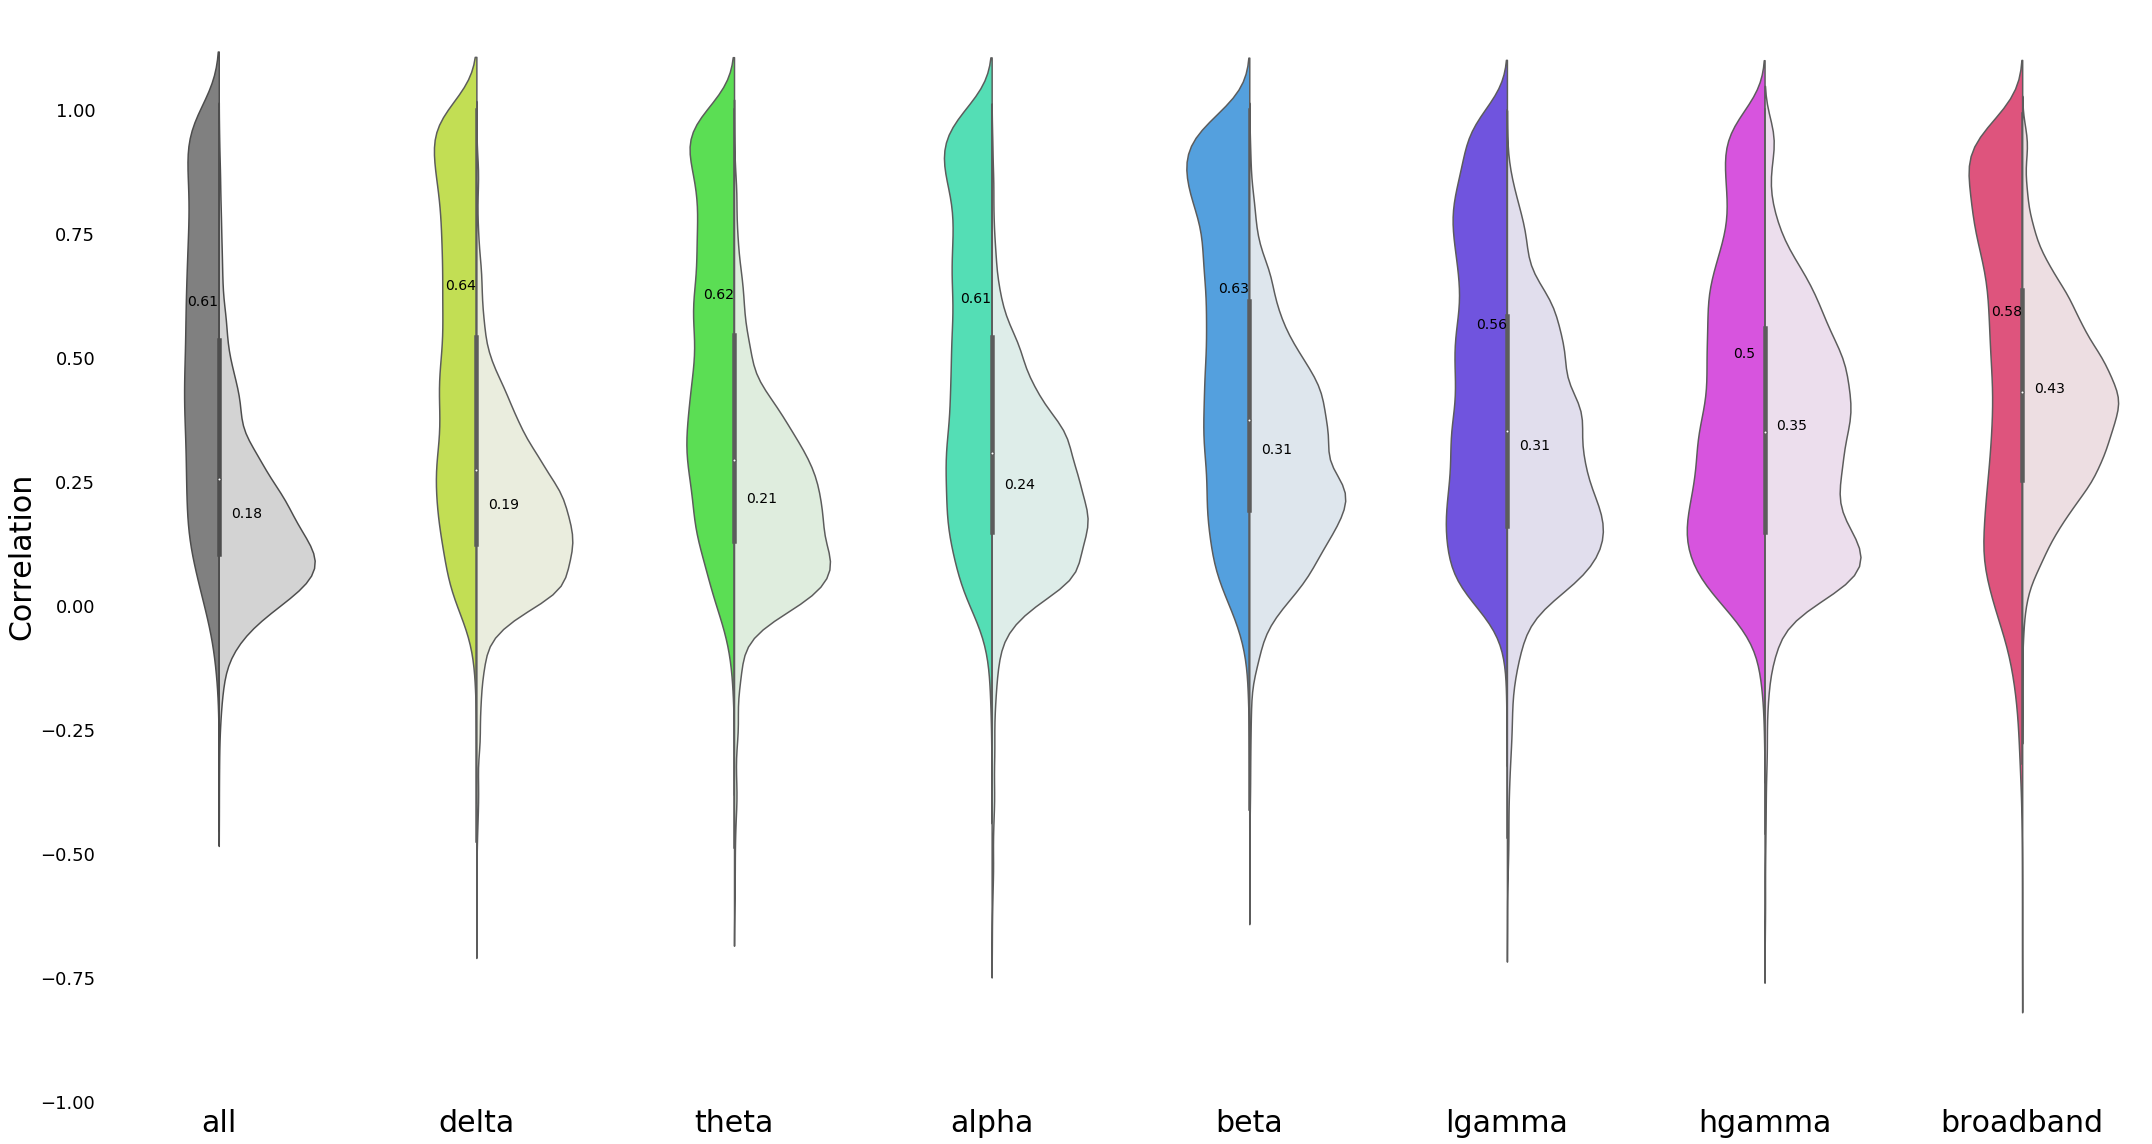

In [ ]:
plot_split_violin_colors(df=long_form_freq, X='Freq', Y='Correlation', H='Subject', 
                         x_order=freqnames, hue_order=['a', 'w'], left_colors=rgba, right_colors=rgba_null)

In [ ]:
def plot_split_barplot_colors(df, X, Y, H, x_order, hue_order, left_colors, right_colors, outfile=None):
    
    """
    X, Y, H :  names of variables in df
        Inputs for plotting long-form data
        
    df :  DataFrame
        Longform dataframe 
    
    hue_order : lists of strings
        Order to plot the categorical hue variable
        
    x_order : lists of strings
        Order to plot the categorical x variable
        
    left_colors, right_colors : RGB or RGBA tuple of float values 
        RGB values
    
    outfile : string
        Save file

    """
    

    fig, axes = plt.subplots(1, len(x_order), figsize=(30, 16), sharey='all')


    for e, freq in enumerate(x_order):

        #freq_df = pd.read_csv(os.path.join(freq_dir, freq + '.csv'), index_col=0)
        long_form_freq_temp = long_form_freq[long_form_freq[X]==freq]

        plt.ylim(-.15,1.05)
        sns.barplot(x=X, y=Y, hue=H, data=long_form_freq_temp, 
                       palette={hue_order[0]: left_colors[e], hue_order[1]: right_colors[e]}, ax=axes[e])
        sns.stripplot(x=X, y=Y, hue=H, data=long_form_freq_temp, jitter=.4, split=True, alpha=.15,
                    palette={hue_order[0]: left_colors[e], hue_order[1]: right_colors[e]}, ax=axes[e])
        axes[e].legend().set_visible(False)
        axes[e].tick_params(axis='x', labelsize=40)
        axes[e].set_xticklabels([freq])
        axes[e].set_xlabel('')
        axes[e].set_ylabel('')
        if e ==0:
            axes[e].tick_params(top='off', bottom='off', left='off', right='off', labelleft='on', labelbottom='on')
        else:
            axes[e].tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
        axes[e].spines['right'].set_visible(False)
        axes[e].spines['left'].set_visible(False)
        axes[e].spines['top'].set_visible(False)
        axes[e].spines['bottom'].set_visible(False)

        z_long_form_freq = long_form_freq_temp.copy(deep=True)
        z_long_form_freq[Y] = plot.r2z(z_long_form_freq[Y])
        yposlist = plot.z2r(z_long_form_freq.groupby([X, H])[Y].mean())
        xposlist = range(1)

#         c = 0
#         for i in range(len(yposlist)):

#             if (i%2) == 0:
#                 axes[e].text(c-.13, yposlist[i], np.round(yposlist[i],2), fontsize=14, color='k')
#             else:
#                 axes[e].text(c+.05, yposlist[i], np.round(yposlist[i],2) , fontsize=14, color='k')
#                 c +=1
                
    axes[0].tick_params(axis='y', which='both', length=0, labelsize=24)
    axes[0].set_ylabel(Y, fontsize=40)
    plt.tight_layout()

    if outfile:
        plt.savefig(outfile)

In [ ]:

plot_split_barplot_colors(df=long_form_freq, X='Freq', Y='Correlation', H='Subject', 
                         x_order=freqnames, hue_order=['a', 'w'], left_colors=rgba, right_colors=rgba_null)